In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats 
import pandas as pd
import json
import myDate
# import xrscipy.signal as dsp

In [2]:
fig_dir = Path('/home/jpluser/ECCO_GMSL/Figures/ECCO_GMSL_otherweight/')
data_dir = Path('/home/jpluser/ECCO_GMSL/Data/GMSL/')
data_dir1 = Path('/home/jpluser/ECCO_GMSL/Data/')

In [3]:
#GMSL from ECCO along track data
# alongtrack_gmsl = xr.open_dataset(str(data_dir_old) + '/GMSL_ECCO_alongtrack_19922017_noerror_otherweight_nomean.nc')
# alongtrack_gmsl_randomnoise = xr.open_dataset(str(data_dir_old) + '/GMSL_ECCO_alongtrack_19922017_randomnoise_otherweight_nomean.nc')
# alongtrack_gmsl_missingdata = xr.open_dataset(str(data_dir_old) + '/GMSL_ECCO_alongtrack_19922017_missingdata_otherweight_nomean.nc')
# alongtrack_gmsl_orbiterror_2cm = xr.open_dataset(str(data_dir_old) + '/GMSL_ECCO_alongtrack_19922017_orbiterror_2cm_otherweight_nomean.nc')
# alongtrack_gmsl_3errors_2cm = xr.open_dataset(str(data_dir_old) + '/GMSL_ECCO_alongtrack_19922017_3errors_2cm_otherweight_nomean.nc')

alongtrack_gmsl_nosicapplied = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_alongtrack_19922017_noerror_otherweight_nomean_nosicapplied.nc')
alongtrack_gmsl_randomnoise_nosicapplied = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_alongtrack_19922017_randomnoise_otherweight_nomean_nosicapplied.nc')
alongtrack_gmsl_missingdata_nosicapplied = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_alongtrack_19922017_missingdata_otherweight_nomean_nosicapplied.nc')
alongtrack_gmsl_orbiterror_2cm_nosicapplied = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_alongtrack_19922017_orbiterror_2cm_otherweight_nomean_nosicapplied.nc')
alongtrack_gmsl_3errors_2cm_nosicapplied = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_alongtrack_19922017_3errors_2cm_otherweight_nomean_nosicapplied.nc')

# GMSL Beckley
# gmsl_beckley = xr.open_dataset(str(data_dir) + '/GMSL_Beckley_v51.nc')
# gmsl_beckley_alongtrack = xr.open_dataset(str(data_dir) + '/GMSL_Beckley_otherweight.nc')

#GMSL from synthetic grids
# gmsl_grids = xr.open_dataset(str(data_dir_old) + '/GMSL_grids_19922017_noerror_100points.nc')
# gmsl_grids_randomnoise = xr.open_dataset(str(data_dir_old) + '/GMSL_grids_19922017_randomnoise_100points.nc')
# gmsl_grids_missingdata = xr.open_dataset(str(data_dir_old) + '/GMSL_grids_19922017_missingdata_100points.nc')
# gmsl_grids_orbiterror_2cm = xr.open_dataset(str(data_dir_old) + '/GMSL_grids_19922017_orbiterror_2cm_100points.nc')
# gmsl_grids_3errors_2cm = xr.open_dataset(str(data_dir_old) + '/GMSL_grids_19922017_3errors_2cm_100points.nc')

gmsl_grids_nosicapplied = xr.open_dataset(str(data_dir) + '/GMSL_grids_19922017_noerror_100points_nosicapplied.nc')
gmsl_grids_randomnoise_nosicapplied = xr.open_dataset(str(data_dir) + '/GMSL_grids_19922017_randomnoise_100points_nosicapplied.nc')
gmsl_grids_missingdata_nosicapplied = xr.open_dataset(str(data_dir) + '/GMSL_grids_19922017_missingdata_100points_nosicapplied.nc')
gmsl_grids_orbiterror_2cm_nosicapplied = xr.open_dataset(str(data_dir) + '/GMSL_grids_19922017_orbiterror_2cm_100points_nosicapplied.nc')
gmsl_grids_3errors_2cm_nosicapplied = xr.open_dataset(str(data_dir) + '/GMSL_grids_19922017_3errors_2cm_100points_nosicapplied.nc')

#GMSL from Beckley daily files
gmsl_alongtrack_beckley = xr.open_dataset(str(data_dir) + '/GMSL_Beckley_dailyfiles_otherweight.nc')

#GMSL from Beckley daily files grids
gmsl_grids_beckley = xr.open_dataset(str(data_dir) + '/GMSL_Beckley_dailyfiles_grids.nc')

# GMSL from ECCO daily outputs
ECCO_global_mean_sea_level_nosicapplied_alllat = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_dailyfiles_19922017_alllat_nosicapplied.nc')
ECCO_global_mean_sea_level_nosicapplied = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_dailyfiles_19922017_nosicapplied.nc')

In [4]:
#ENSO index
with open(str(data_dir1) + '/ENSO_sealeveljpl_092024.json') as f:
  enso = json.load(f)
df = pd.DataFrame.from_dict(enso)
df.shape

(1647, 5)

In [5]:
df = np.array(df)
start_date=np.datetime64('1950-01-01')
time=[]
enso_id=[]
for i in range(0,df.shape[0]):
    enso_id=np.hstack((enso_id,float(df[i][0]['y'])))
    yr=int(np.floor(float(df[i][0]['x'])))
    doy=int(np.floor((float(df[i][0]['x'])-yr)*365))+1
    time=np.hstack((time,myDate.date2jj(myDate.doy2date(yr,doy)[0],myDate.doy2date(yr,doy)[1],myDate.doy2date(yr,doy)[2])))

In [6]:
enso = {'enso_id': xr.DataArray(enso_id, dims='time', coords={'time': start_date + np.timedelta64(1, 'D') * time})}
enso = xr.Dataset(enso)
enso=enso.sel(time=slice('1992-01-01','2017-12-31'))
enso

/tmp/ipykernel_88490/3429245060.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  enso = {'enso_id': xr.DataArray(enso_id, dims='time', coords={'time': start_date + np.timedelta64(1, 'D') * time})}


<xarray.Dataset> Size: 21kB
Dimensions:  (time: 1310)
Coordinates:
  * time     (time) datetime64[ns] 10kB 1992-10-04 1992-10-11 ... 2017-12-24
Data variables:
    enso_id  (time) float64 10kB 0.5452 0.4932 0.4423 ... -0.4973 -0.4514

In [7]:
# FIGURE 1 GMSL ALL ######################################

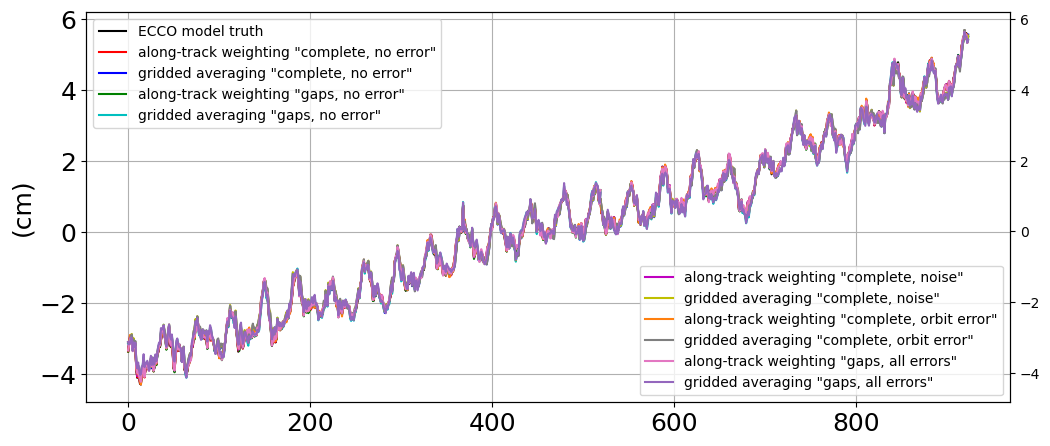

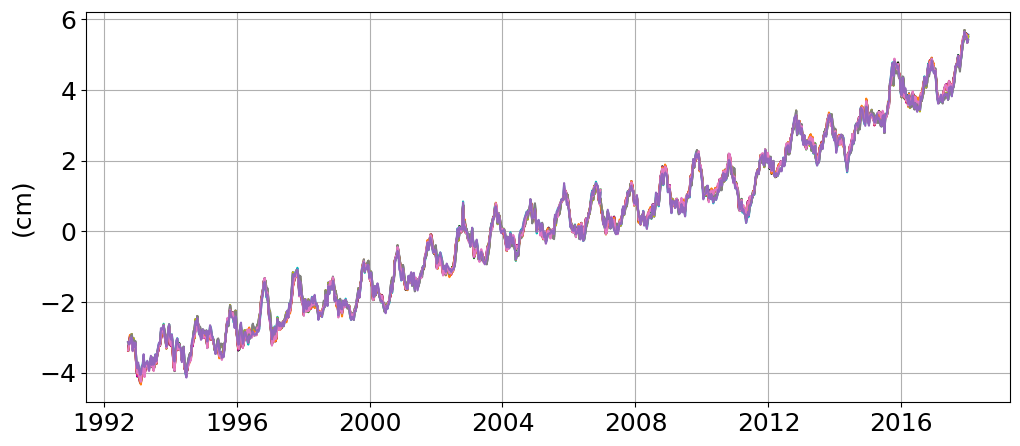

In [8]:
# fig,ax=plt.subplots(figsize=(10,5))
# (ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='ECCO');
# (gmsl_grids_nosicapplied.gmsl_grids*100).plot(label='alongtrack (no error)');
# (alongtrack_gmsl.gmsl_ecco_alongtrack*100).plot(label='grids (no error)');
# (gmsl_grids_missingdata_nosicapplied.gmsl_grids*100).plot(label='alongtrack (missing data)');
# (alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack*100).plot(label='grids (missing data)');
# (gmsl_grids_randomnoise_nosicapplied.gmsl_grids*100).plot(label='alongtrack (random noise)');
# (alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack*100).plot(label='grids (random noise)');
# (gmsl_grids_orbiterror_2cm_nosicapplied.gmsl_grids*100).plot(label='alongtrack (orbit error)');
# (alongtrack_gmsl_orbiterror_2cm.gmsl_ecco_alongtrack*100).plot(label='grids (orbit error)');
# (gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100).plot(label='alongtrack (missing data+random noise+orbit error)');
# (alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100).plot(label='grids (missing data+random noise+orbit error)');
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL', fontsize=18)
# plt.legend(ncol=2, loc='upper left',fontsize=9)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig1_GMSL_all_2cm.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

fig,ax=plt.subplots(figsize=(11,5))
ax2 = ax.twinx()
ax.plot(ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100,label='ECCO model truth',color='k');
ax.plot(gmsl_grids_nosicapplied.gmsl_grids*100,label='along-track weighting "complete, no error"',color='r');
ax.plot(alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100,label='gridded averaging "complete, no error"',color='b');
ax.plot(gmsl_grids_missingdata_nosicapplied.gmsl_grids*100,label='along-track weighting "gaps, no error"',color='g');
ax.plot(alongtrack_gmsl_missingdata_nosicapplied.gmsl_ecco_alongtrack*100,label='gridded averaging "gaps, no error"',color='c');
ax2.plot(gmsl_grids_randomnoise_nosicapplied.gmsl_grids*100,label='along-track weighting "complete, noise"',color='m');
ax2.plot(alongtrack_gmsl_randomnoise_nosicapplied.gmsl_ecco_alongtrack*100,label='gridded averaging "complete, noise"',color='y');
ax2.plot(gmsl_grids_orbiterror_2cm_nosicapplied.gmsl_grids*100,label='along-track weighting "complete, orbit error"',color='tab:orange');
ax2.plot(alongtrack_gmsl_orbiterror_2cm_nosicapplied.gmsl_ecco_alongtrack*100,label='gridded averaging "complete, orbit error"',color='tab:gray');
ax2.plot(gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100,label='along-track weighting "gaps, all errors"',color='tab:pink');
ax2.plot(alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100,label='gridded averaging "gaps, all errors"',color='tab:purple');
ax.grid()
ax.set_ylabel('(cm)',fontsize=18)
ax2.set_ylabel('')
plt.xlabel('')
ax.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL', fontsize=18)
ax.legend(loc='upper left',fontsize=10)
ax2.legend(loc='lower right',fontsize=10)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig1_GMSL_all_2cm_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

fig,ax=plt.subplots(figsize=(11,5))
(ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='ECCO model truth',color='k');
(gmsl_grids_nosicapplied.gmsl_grids*100).plot(label='along-track weighting "complete, no error"',color='r');
(alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).plot(label='gridded averaging "complete, no error"',color='b');
(gmsl_grids_missingdata_nosicapplied.gmsl_grids*100).plot(label='along-track weighting "gaps, no error"',color='g');
(alongtrack_gmsl_missingdata_nosicapplied.gmsl_ecco_alongtrack*100).plot(label='gridded averaging "gaps, no error"',color='c');
(gmsl_grids_randomnoise_nosicapplied.gmsl_grids*100).plot(label='along-track weighting "complete, noise"',color='m');
(alongtrack_gmsl_randomnoise_nosicapplied.gmsl_ecco_alongtrack*100).plot(label='gridded averaging "complete, noise"',color='y');
(gmsl_grids_orbiterror_2cm_nosicapplied.gmsl_grids*100).plot(label='along-track weighting "complete, orbit error"',color='tab:orange');
(alongtrack_gmsl_orbiterror_2cm_nosicapplied.gmsl_ecco_alongtrack*100).plot(label='gridded averaging "complete, orbit error"',color='tab:gray');
(gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100).plot(label='along-track weighting "gaps, all errors"',color='tab:pink');
(alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100).plot(label='gridded averaging "gaps, all errors"',color='tab:purple');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
ax.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL', fontsize=18)
label_params = ax.get_legend_handles_labels()
# ax.legend(loc='upper left',fontsize=10)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig1_GMSL_all_2cm_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

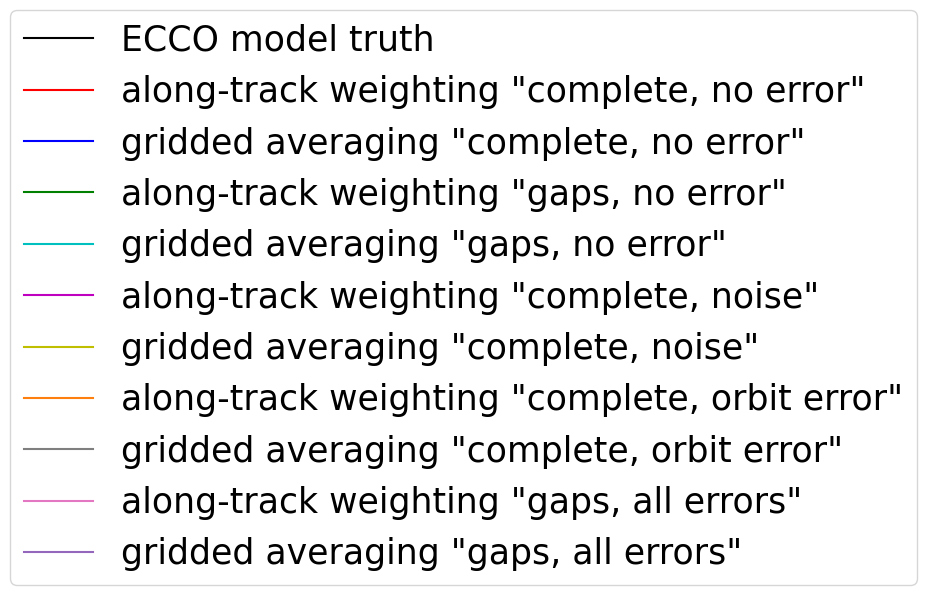

In [9]:
figl, axl = plt.subplots(figsize=(11,5))
axl.axis(False)
axl.legend(*label_params, loc="center", bbox_to_anchor=(0.5, 0.5), prop={"size":25})
figl.savefig(fig_dir / 'legend.png',bbox_inches='tight')

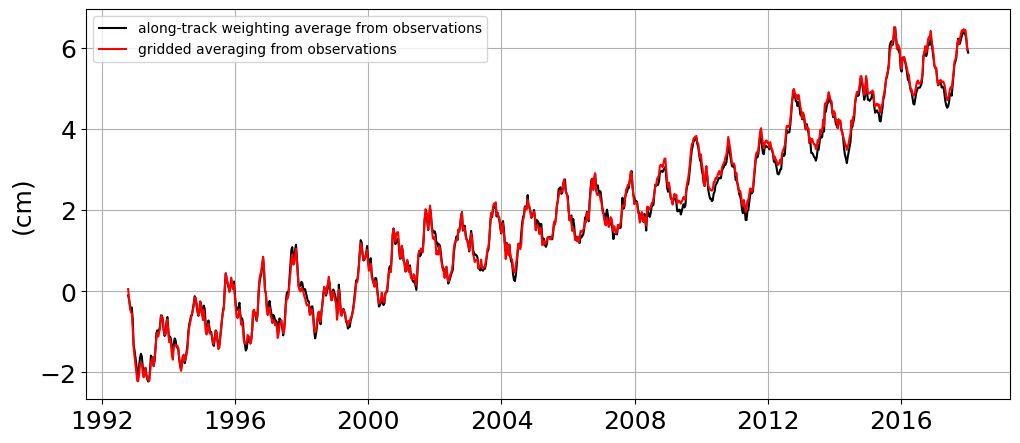

In [35]:
fig,ax=plt.subplots(figsize=(11,5))
(gmsl_alongtrack_beckley.gmsl_beckley_daily_alongtrack*100).plot(label='along-track weighting average from observations',color='k');
(gmsl_grids_beckley.gmsl_grids_beckley*100).plot(label='gridded averaging from observations',color='r');
ax.grid()
ax.set_ylabel('(cm)',fontsize=18)
ax2.set_ylabel('')
plt.xlabel('')
ax.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL', fontsize=18)
ax.legend(loc='upper left',fontsize=10)
ax2.legend(loc='lower right',fontsize=10)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig5_GMSL_obs.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

In [ ]:
# ECCO_global_mean_sea_level = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_dailyfiles_19922017.nc')
# ECCO_global_mean_sea_level = xr.open_dataset(str(data_dir) + '/GMSL_ECCO_dailyfiles_19922017.nc')
# smooth_diff=(ECCO_global_mean_sea_level.gmsl_ecco*100-ECCO_global_mean_sea_level.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

# fig,ax=plt.subplots(figsize=(10,5))
# (ECCO_global_mean_sea_level.gmsl_ecco*100-ECCO_global_mean_sea_level.gmsl_ecco*100).plot(label='+/-90 - +/-66');
# smooth_diff.plot(linewidth=3,color='r');
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('ECCO GMSL', fontsize=18)
# plt.legend(ncol=2, loc='upper left',fontsize=9)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig1a_GMSL_diff_66.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

0.1390550472708553 0.04750110239039088


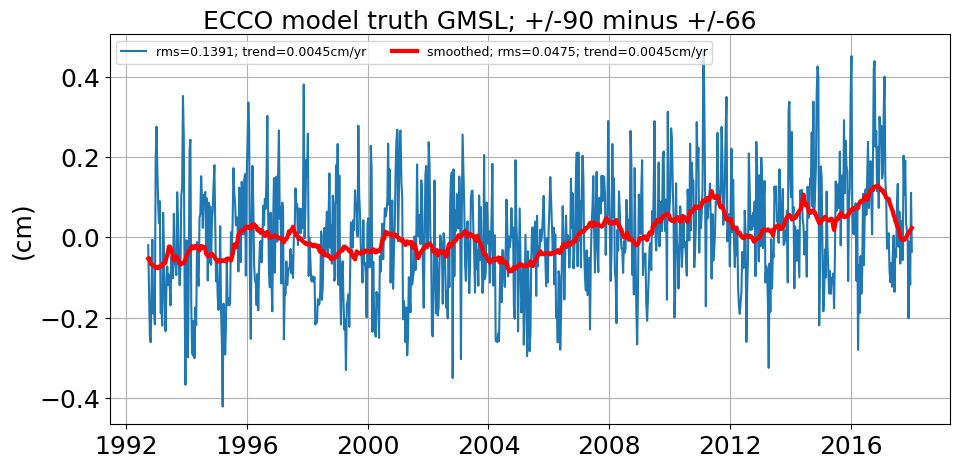

In [11]:
smooth_diff=(ECCO_global_mean_sea_level_nosicapplied_alllat.gmsl_ecco*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite((ECCO_global_mean_sea_level_nosicapplied_alllat.gmsl_ecco*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values))        
rms_alongtrack=np.sqrt(np.nansum((ECCO_global_mean_sea_level_nosicapplied_alllat.gmsl_ecco*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff.values))        
smooth_rms_alongtrack=np.sqrt(np.nansum(smooth_diff.values[ind]**2,axis=0)/len(ind[0]))
print(rms_alongtrack,smooth_rms_alongtrack)

result = (ECCO_global_mean_sea_level_nosicapplied_alllat.gmsl_ecco*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff).polyfit(dim = "time", skipna=True, deg = 1)
trend_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365

fig,ax=plt.subplots(figsize=(10,5))
(ECCO_global_mean_sea_level_nosicapplied_alllat.gmsl_ecco*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_alongtrack+'; trend='+"%.4f" % trend+'cm/yr');
smooth_diff.plot(linewidth=3,color='r',label='smoothed; rms='+"%.4f" % smooth_rms_alongtrack+'; trend='+"%.4f" % trend_smooth+'cm/yr');
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
fig.suptitle('ECCO model truth GMSL; +/-90 minus +/-66', fontsize=18)
plt.legend(ncol=2, loc='upper left',fontsize=9)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig1a_GMSL_diff_alllat_66_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

In [12]:
tmp=ECCO_global_mean_sea_level_nosicapplied_alllat.sel(time=slice('2005-01-01','2018-01-31'))
tmp2=ECCO_global_mean_sea_level_nosicapplied.sel(time=slice('2005-01-01','2018-01-31'))
smooth_diff=(tmp.gmsl_ecco*100-tmp2.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

In [13]:
result = (tmp.gmsl_ecco*100-tmp2.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff).polyfit(dim = "time", skipna=True, deg = 1)
trend_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
print(trend,trend_smooth)

0.008032719042465362 0.007936402977155583


# FIGURES 2 AND 3 - DIFF ALONG TRACK/GRIDS - ECCO ######################################

In [14]:
# t=np.linspace(0, 1, len(alongtrack_gmsl.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(alongtrack_gmsl.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_alongtrack=(alongtrack_gmsl.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms_alongtrack=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
# smooth_rms_alongtrack=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))

# t=np.linspace(0, 1, len(gmsl_grids.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(gmsl_grids.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_grids=(gmsl_grids.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms_grids=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_grids.values))        
# smooth_rms_grids=np.sqrt(np.nansum(smooth_diff_grids.values[ind]**2,axis=0)/len(ind[0]))

# fig,ax=plt.subplots(figsize=(10,5))
# (alongtrack_gmsl.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_alongtrack);
# smooth_diff_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_alongtrack);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL simulated alongtrack (no error) - ECCO', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig2_GMSL_diff_ecco_alongtrack_noerror.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

# fig,ax=plt.subplots(figsize=(10,5))
# (gmsl_grids.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_grids);
# smooth_diff_grids.plot(linewidth=3,color='m',label='rms='+"%.4f" % smooth_rms_grids);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL simulated grids (no error) - ECCO', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig3_GMSL_diff_ecco_grids_noerror.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

In [15]:
# t=np.linspace(0, 1, len(alongtrack_gmsl_randomnoise.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_randomnoise_alongtrack=(alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms_randomnoise_alongtrack=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_randomnoise_alongtrack.values))        
# smooth_rms_randomnoise_alongtrack=np.sqrt(np.nansum(smooth_diff_randomnoise_alongtrack.values[ind]**2,axis=0)/len(ind[0]))

# t=np.linspace(0, 1, len(gmsl_grids_randomnoise.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(gmsl_grids_randomnoise.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_randomnoise_grids=(gmsl_grids_randomnoise.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms_randomnoise_grids=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_randomnoise_grids.values))        
# smooth_rms_randomnoise_grids=np.sqrt(np.nansum(smooth_diff_randomnoise_grids.values[ind]**2,axis=0)/len(ind[0]))


# fig,ax=plt.subplots(figsize=(10,5))
# (alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_randomnoise_alongtrack);
# # (gmsl_grids_randomnoise.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='grids-ECCO; rms='+"%.4f" % rms_randomnoise_grids);
# smooth_diff_randomnoise_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_randomnoise_alongtrack);
# # smooth_diff_randomnoise_grids.plot(linewidth=3,color='m',label='grids-ECCO; rms='+"%.4f" % smooth_rms_randomnoise_grids);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL simulated alongtrack (random noise) - ECCO', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig2_GMSL_diff_ecco_alongtrack_randomnoise.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

# fig,ax=plt.subplots(figsize=(10,5))
# # (alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_randomnoise_alongtrack);
# (gmsl_grids_randomnoise.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_randomnoise_grids);
# # smooth_diff_randomnoise_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_randomnoise_alongtrack);
# smooth_diff_randomnoise_grids.plot(linewidth=3,color='m',label='rms='+"%.4f" % smooth_rms_randomnoise_grids);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL simulated grids (random noise) - ECCO', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig3_GMSL_diff_ecco_grids_randomnoise.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

In [16]:
# t=alongtrack_gmsl_missingdata.time.values
# a=(alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values
# ind=np.where(np.isfinite(a))
# a=a[ind]
# t=t[ind]
# t=np.linspace(0, 1, len(t)) #need to be between 0 and 1
# sig=xr.DataArray(data=a,dims=['time'],coords=dict(time=t))
# t=alongtrack_gmsl_missingdata.time.values
# t=t[ind]
# smooth_diff_missingdata_alongtrack=(alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms_missingdata_alongtrack=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_missingdata_alongtrack.values))        
# smooth_rms_missingdata_alongtrack=np.sqrt(np.nansum(smooth_diff_missingdata_alongtrack.values[ind]**2,axis=0)/len(ind[0]))

# t=np.linspace(0, 1, len(gmsl_grids_missingdata.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(gmsl_grids_missingdata.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_missingdata_grids=(gmsl_grids_missingdata.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms_missingdata_grids=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_missingdata_grids.values))        
# smooth_rms_missingdata_grids=np.sqrt(np.nansum(smooth_diff_missingdata_grids.values[ind]**2,axis=0)/len(ind[0]))


# fig,ax=plt.subplots(figsize=(10,5))
# (alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_missingdata_alongtrack);
# # (gmsl_grids_missingdata.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='grids-ECCO; rms='+"%.4f" % rms_missingdata_grids);
# smooth_diff_missingdata_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_missingdata_alongtrack);
# # smooth_diff_missingdata_grids.plot(linewidth=3,color='m',label='grids-ECCO; rms='+"%.4f" % smooth_rms_missingdata_grids);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL simulated alongtrack (missing data) - ECCO', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig2_GMSL_diff_ecco_alongtrack_missingdata.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')


# fig,ax=plt.subplots(figsize=(10,5))
# # (alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_missingdata_alongtrack);
# (gmsl_grids_missingdata.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_missingdata_grids);
# # smooth_diff_missingdata_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_missingdata_alongtrack);
# smooth_diff_missingdata_grids.plot(linewidth=3,color='m',label='rms='+"%.4f" % smooth_rms_missingdata_grids);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL simulated grids (missing data) - ECCO', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig3_GMSL_diff_ecco_grids_missingdata.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

In [17]:
# t=np.linspace(0, 1, len(alongtrack_gmsl_orbiterror_2cm.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(alongtrack_gmsl_orbiterror_2cm.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_orbiterror_alongtrack2=(alongtrack_gmsl_orbiterror_2cm.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms_orbiterror_alongtrack=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_orbiterror_alongtrack2.values))        
# smooth_rms_orbiterror_alongtrack=np.sqrt(np.nansum(smooth_diff_orbiterror_alongtrack2.values[ind]**2,axis=0)/len(ind[0]))

# t=np.linspace(0, 1, len(gmsl_grids_orbiterror_2cm.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(gmsl_grids_orbiterror_2cm.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_orbiterror_grids2=(gmsl_grids_orbiterror_2cm.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms_orbiterror_grids=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_orbiterror_grids2.values))        
# smooth_rms_orbiterror_grids=np.sqrt(np.nansum(smooth_diff_orbiterror_grids2.values[ind]**2,axis=0)/len(ind[0]))

# fig,ax=plt.subplots(figsize=(10,5))
# (alongtrack_gmsl_orbiterror_2cm.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_orbiterror_alongtrack);
# # (gmsl_grids_orbiterror_2cm.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='grids-ECCO; rms='+"%.4f" % rms_orbiterror_grids);
# smooth_diff_orbiterror_alongtrack2.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_orbiterror_alongtrack);
# # smooth_diff_orbiterror_grids2.plot(linewidth=3,color='m',label='grids-ECCO; rms='+"%.4f" % smooth_rms_orbiterror_grids);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL simulated alongtrack (orbit error) - ECCO', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig2_GMSL_diff_ecco_alongtrack_orbiterror_2cm.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

# fig,ax=plt.subplots(figsize=(10,5))
# # (alongtrack_gmsl_orbiterror_2cm.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_orbiterror_alongtrack);
# (gmsl_grids_orbiterror_2cm.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_orbiterror_grids);
# # smooth_diff_orbiterror_alongtrack2.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_orbiterror_alongtrack);
# smooth_diff_orbiterror_grids2.plot(linewidth=3,color='m',label='rms='+"%.4f" % smooth_rms_orbiterror_grids);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL simulated grids (orbit error) - ECCO', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig3_GMSL_diff_ecco_grids_orbiterror_2cm.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

In [18]:
# t=alongtrack_gmsl_3errors_2cm.time.values
# a=(alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values
# ind=np.where(np.isfinite(a))
# a=a[ind]
# t=t[ind]
# t=np.linspace(0, 1, len(t)) #need to be between 0 and 1
# sig=xr.DataArray(data=a,dims=['time'],coords=dict(time=t))
# t=alongtrack_gmsl_3errors_2cm.time.values
# t=t[ind]
# smooth_diff_3errors_alongtrack2=(alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms_3errors_alongtrack=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_3errors_alongtrack2.values))        
# smooth_rms_3errors_alongtrack=np.sqrt(np.nansum(smooth_diff_3errors_alongtrack2.values[ind]**2,axis=0)/len(ind[0]))

# t=np.linspace(0, 1, len(gmsl_grids_3errors_2cm.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(gmsl_grids_3errors_2cm.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_3errors_grids2=(gmsl_grids_3errors_2cm.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms_3errors_grids=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_3errors_grids2.values))        
# smooth_rms_3errors_grids=np.sqrt(np.nansum(smooth_diff_3errors_grids2.values[ind]**2,axis=0)/len(ind[0]))

# fig,ax=plt.subplots(figsize=(10,5))
# (alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_3errors_alongtrack);
# # (gmsl_grids_3errors_2cm.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='grids-ECCO; rms='+"%.4f" % rms_3errors_grids);
# smooth_diff_3errors_alongtrack2.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_3errors_alongtrack);
# # smooth_diff_3errors_grids2.plot(linewidth=3,color='m',label='grids-ECCO; rms='+"%.4f" % smooth_rms_3errors_grids);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL simulated alongtrack (missing data+random noise+orbit error) - ECCO', fontsize=16)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig2_GMSL_diff_ecco_alongtrack_3errors_2cm.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')


# fig,ax=plt.subplots(figsize=(10,5))
# # (alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_3errors_alongtrack);
# (gmsl_grids_3errors_2cm.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_3errors_grids);
# # smooth_diff_3errors_alongtrack2.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_3errors_alongtrack);
# smooth_diff_3errors_grids2.plot(linewidth=3,color='m',label='rms='+"%.4f" % smooth_rms_3errors_grids);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL simulated grids (missing data+random noise+orbit error) - ECCO', fontsize=16)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig3_GMSL_diff_ecco_grids_3errors_2cm.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

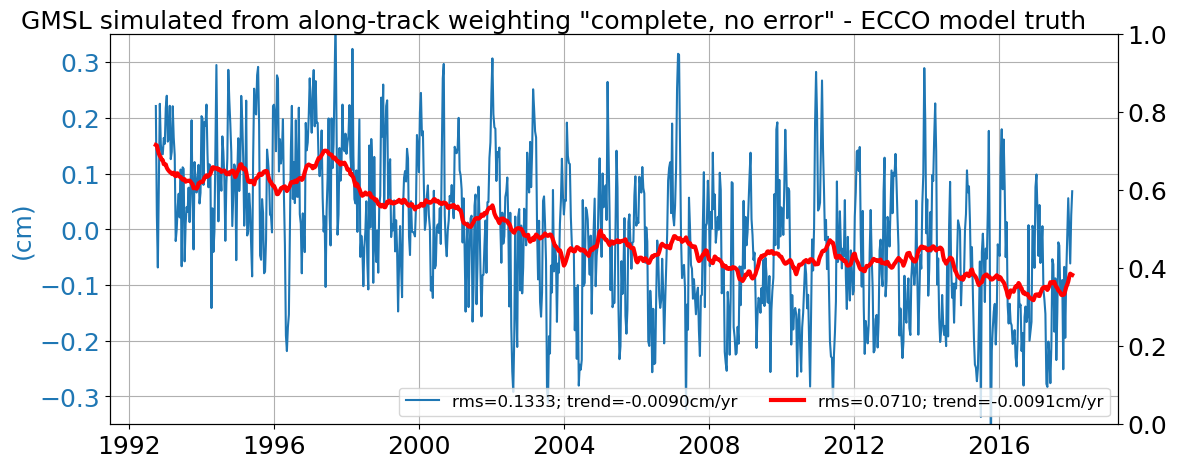

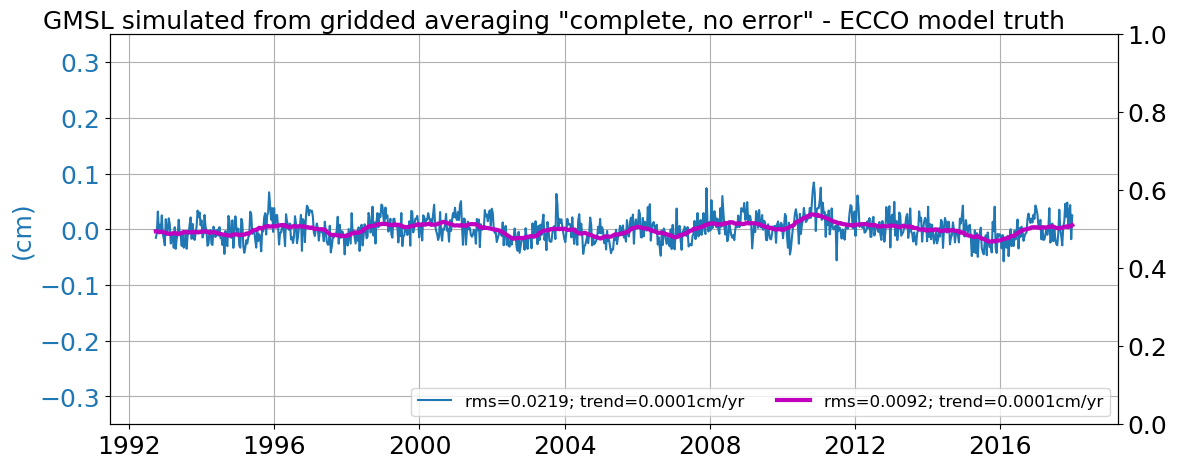

In [19]:
t=np.linspace(0, 1, len(alongtrack_gmsl_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_alongtrack=(alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms_alongtrack=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
smooth_rms_alongtrack=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))

result = (alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff_alongtrack).polyfit(dim = "time", skipna=True, deg = 1)
trend_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365

t=np.linspace(0, 1, len(gmsl_grids_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(gmsl_grids_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_grids=(gmsl_grids_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms_grids=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_grids.values))        
smooth_rms_grids=np.sqrt(np.nansum(smooth_diff_grids.values[ind]**2,axis=0)/len(ind[0]))

result = (gmsl_grids_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend_grid = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff_grids).polyfit(dim = "time", skipna=True, deg = 1)
trend_grid_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365

fig,ax=plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.plot(alongtrack_gmsl_nosicapplied.time,alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100,label='rms='+"%.4f" % rms_alongtrack+'; trend='+"%.4f" % trend+'cm/yr');
ax.plot(smooth_diff_alongtrack.time,smooth_diff_alongtrack,linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_alongtrack+'; trend='+"%.4f" % trend_smooth+'cm/yr');
ax.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.35,0.35)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL simulated from along-track weighting "complete, no error" - ECCO model truth', fontsize=18)
ax.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig2_GMSL_diff_ecco_alongtrack_noerror_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

fig,ax=plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.plot(gmsl_grids_nosicapplied.time,gmsl_grids_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100,label='rms='+"%.4f" % rms_grids+'; trend='+"%.4f" % trend_grid+'cm/yr');
ax.plot(smooth_diff_grids.time,smooth_diff_grids,linewidth=3,color='m',label='rms='+"%.4f" % smooth_rms_grids+'; trend='+"%.4f" % trend_grid_smooth+'cm/yr');
ax.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.35,0.35)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL simulated from gridded averaging "complete, no error" - ECCO model truth', fontsize=18)
ax.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig3_GMSL_diff_ecco_grids_noerror_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

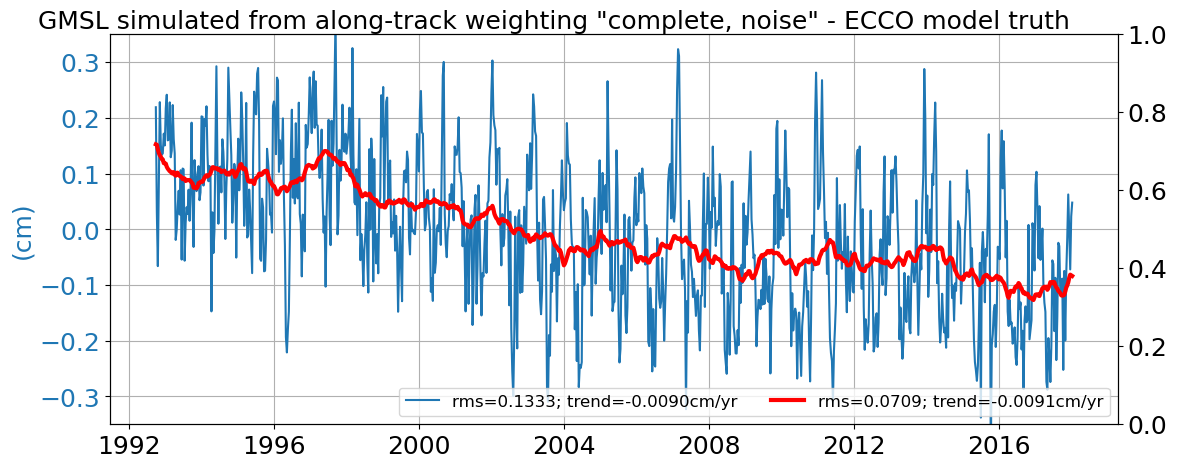

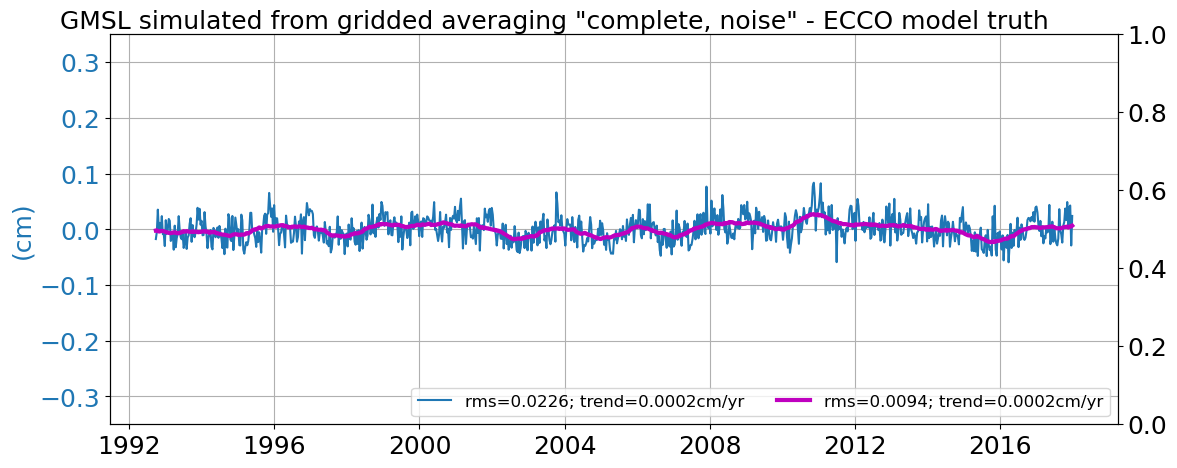

In [20]:
t=np.linspace(0, 1, len(alongtrack_gmsl_randomnoise_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(alongtrack_gmsl_randomnoise_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_randomnoise_alongtrack=(alongtrack_gmsl_randomnoise_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms_randomnoise_alongtrack=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_randomnoise_alongtrack.values))        
smooth_rms_randomnoise_alongtrack=np.sqrt(np.nansum(smooth_diff_randomnoise_alongtrack.values[ind]**2,axis=0)/len(ind[0]))

result = (alongtrack_gmsl_randomnoise_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff_randomnoise_alongtrack).polyfit(dim = "time", skipna=True, deg = 1)
trend_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365

t=np.linspace(0, 1, len(gmsl_grids_randomnoise_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(gmsl_grids_randomnoise_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_randomnoise_grids=(gmsl_grids_randomnoise_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms_randomnoise_grids=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_randomnoise_grids.values))        
smooth_rms_randomnoise_grids=np.sqrt(np.nansum(smooth_diff_randomnoise_grids.values[ind]**2,axis=0)/len(ind[0]))

result = (gmsl_grids_randomnoise_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend_grid = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff_randomnoise_grids).polyfit(dim = "time", skipna=True, deg = 1)
trend_grid_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365

fig,ax=plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.plot(alongtrack_gmsl_randomnoise_nosicapplied.time,alongtrack_gmsl_randomnoise_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100,label='rms='+"%.4f" % rms_randomnoise_alongtrack+'; trend='+"%.4f" % trend+'cm/yr');
# (gmsl_grids_randomnoise_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='grids-ECCO; rms='+"%.4f" % rms_randomnoise_grids);
ax.plot(smooth_diff_randomnoise_alongtrack.time,smooth_diff_randomnoise_alongtrack,linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_randomnoise_alongtrack+'; trend='+"%.4f" % trend_smooth+'cm/yr');
# smooth_diff_randomnoise_grids.plot(linewidth=3,color='m',label='grids-ECCO; rms='+"%.4f" % smooth_rms_randomnoise_grids);
ax.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.35,0.35)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL simulated from along-track weighting "complete, noise" - ECCO model truth', fontsize=18)
ax.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig2_GMSL_diff_ecco_alongtrack_randomnoise_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

fig,ax=plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
# (alongtrack_gmsl_randomnoise_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_randomnoise_alongtrack);
ax.plot(gmsl_grids_randomnoise_nosicapplied.time,gmsl_grids_randomnoise_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100,label='rms='+"%.4f" % rms_randomnoise_grids+'; trend='+"%.4f" % trend_grid+'cm/yr');
# smooth_diff_randomnoise_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_randomnoise_alongtrack);
ax.plot(smooth_diff_randomnoise_grids.time,smooth_diff_randomnoise_grids,linewidth=3,color='m',label='rms='+"%.4f" % smooth_rms_randomnoise_grids+'; trend='+"%.4f" % trend_grid_smooth+'cm/yr');
ax.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.35,0.35)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL simulated from gridded averaging "complete, noise" - ECCO model truth', fontsize=18)
ax.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig3_GMSL_diff_ecco_grids_randomnoise_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

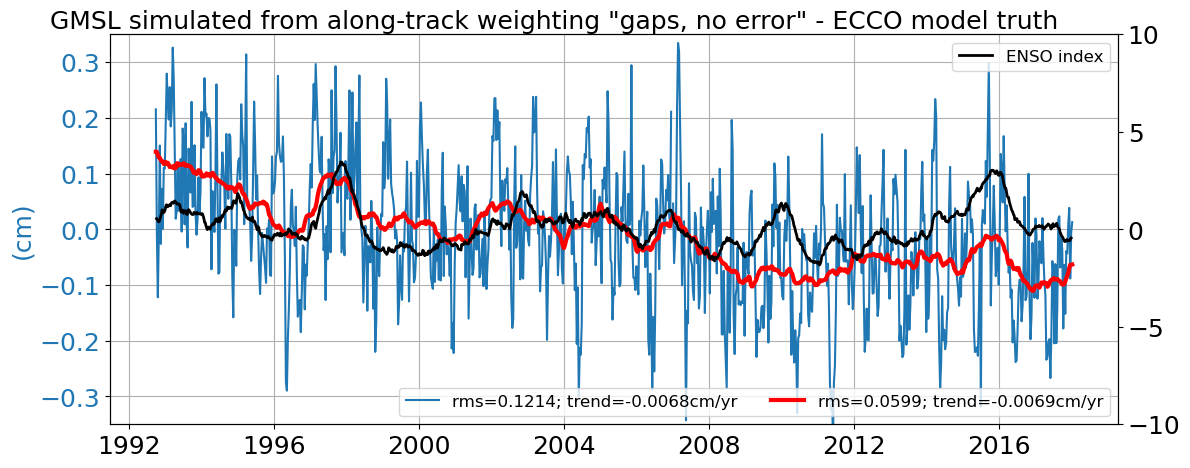

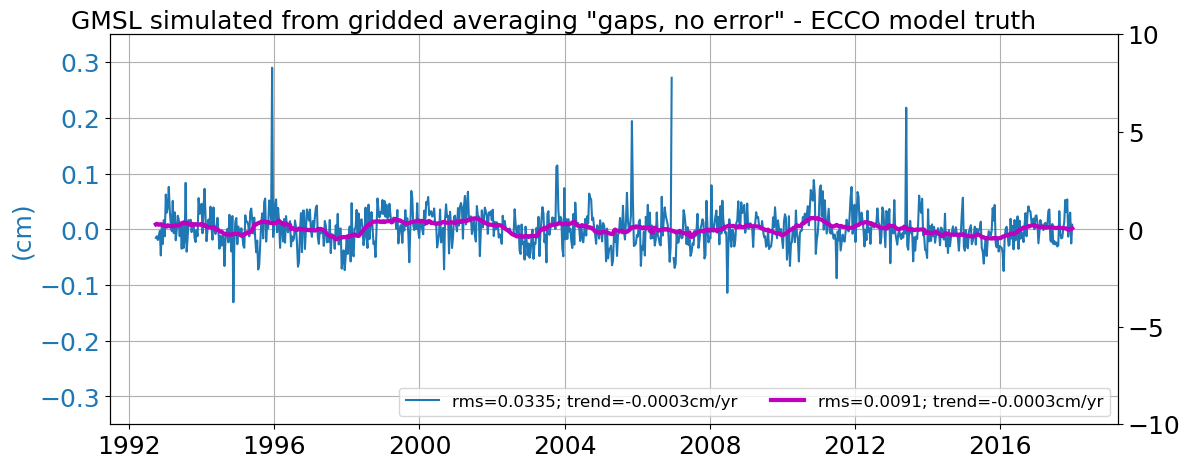

In [21]:
t=alongtrack_gmsl_missingdata_nosicapplied.time.values
a=(alongtrack_gmsl_missingdata_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values
ind=np.where(np.isfinite(a))
a=a[ind]
t=t[ind]
t=np.linspace(0, 1, len(t)) #need to be between 0 and 1
sig=xr.DataArray(data=a,dims=['time'],coords=dict(time=t))
t=alongtrack_gmsl_missingdata_nosicapplied.time.values
t=t[ind]
smooth_diff_missingdata_alongtrack=(alongtrack_gmsl_missingdata_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms_missingdata_alongtrack=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_missingdata_alongtrack.values))        
smooth_rms_missingdata_alongtrack=np.sqrt(np.nansum(smooth_diff_missingdata_alongtrack.values[ind]**2,axis=0)/len(ind[0]))

result = (alongtrack_gmsl_missingdata_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff_missingdata_alongtrack).polyfit(dim = "time", skipna=True, deg = 1)
trend_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365

t=np.linspace(0, 1, len(gmsl_grids_missingdata_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(gmsl_grids_missingdata_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_missingdata_grids=(gmsl_grids_missingdata_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms_missingdata_grids=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_missingdata_grids.values))        
smooth_rms_missingdata_grids=np.sqrt(np.nansum(smooth_diff_missingdata_grids.values[ind]**2,axis=0)/len(ind[0]))

result = (gmsl_grids_missingdata_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend_grid = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff_missingdata_grids).polyfit(dim = "time", skipna=True, deg = 1)
trend_grid_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365

fig,ax=plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.plot(alongtrack_gmsl_missingdata_nosicapplied.time,alongtrack_gmsl_missingdata_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100,label='rms='+"%.4f" % rms_missingdata_alongtrack+'; trend='+"%.4f" % trend+'cm/yr');
# (gmsl_grids_missingdata_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='grids-ECCO; rms='+"%.4f" % rms_missingdata_grids);
ax2.plot(enso.time,enso.enso_id,label='ENSO index',color='k',linewidth=2);
ax.plot(smooth_diff_missingdata_alongtrack.time,smooth_diff_missingdata_alongtrack,linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_missingdata_alongtrack+'; trend='+"%.4f" % trend_smooth+'cm/yr');
# smooth_diff_missingdata_grids.plot(linewidth=3,color='m',label='grids-ECCO; rms='+"%.4f" % smooth_rms_missingdata_grids);
ax.grid()
# ax2.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.35,0.35)
ax2.set_ylim(-10,10)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL simulated from along-track weighting "gaps, no error" - ECCO model truth', fontsize=18)
ax.legend(ncol=2, loc='lower right',fontsize=12)
ax2.legend(ncol=2, loc='upper right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig2_GMSL_diff_ecco_alongtrack_missingdata_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')


fig,ax=plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
# (alongtrack_gmsl_missingdata_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_missingdata_alongtrack);
ax.plot(gmsl_grids_missingdata_nosicapplied.time,gmsl_grids_missingdata_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100,label='rms='+"%.4f" % rms_missingdata_grids+'; trend='+"%.4f" % trend_grid+'cm/yr');
# smooth_diff_missingdata_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_missingdata_alongtrack);
ax.plot(smooth_diff_missingdata_grids.time,smooth_diff_missingdata_grids,linewidth=3,color='m',label='rms='+"%.4f" % smooth_rms_missingdata_grids+'; trend='+"%.4f" % trend_grid_smooth+'cm/yr');
ax.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.35,0.35)
ax2.set_ylim(-10,10)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL simulated from gridded averaging "gaps, no error" - ECCO model truth', fontsize=18)
ax.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig3_GMSL_diff_ecco_grids_missingdata_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

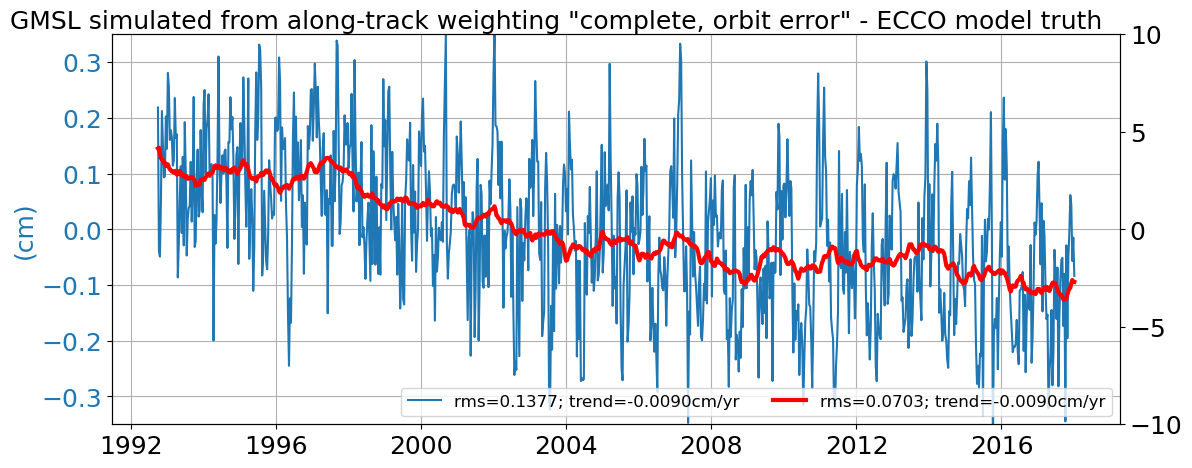

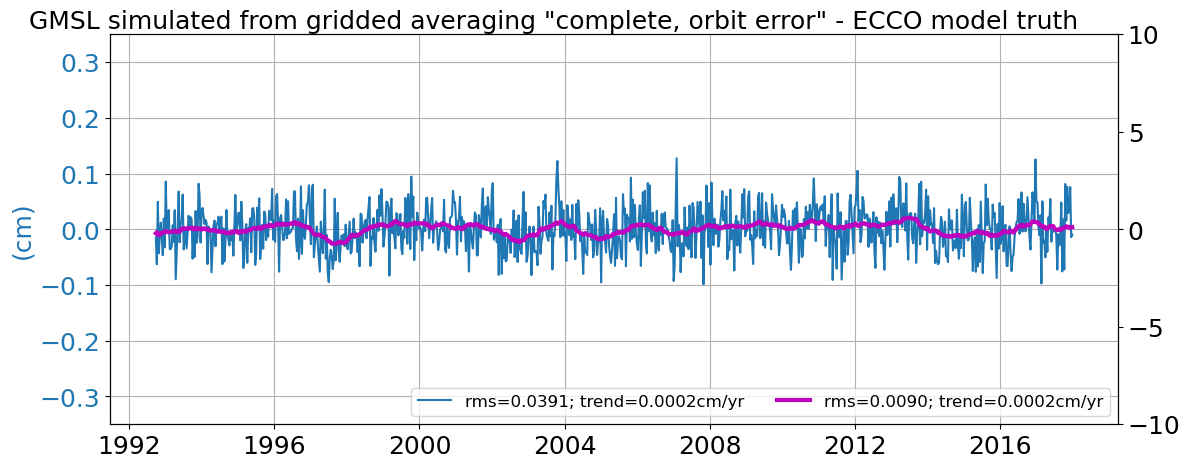

In [22]:
t=np.linspace(0, 1, len(alongtrack_gmsl_orbiterror_2cm_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(alongtrack_gmsl_orbiterror_2cm_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_orbiterror_alongtrack2=(alongtrack_gmsl_orbiterror_2cm_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms_orbiterror_alongtrack=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_orbiterror_alongtrack2.values))        
smooth_rms_orbiterror_alongtrack=np.sqrt(np.nansum(smooth_diff_orbiterror_alongtrack2.values[ind]**2,axis=0)/len(ind[0]))

result = (alongtrack_gmsl_orbiterror_2cm_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff_orbiterror_alongtrack2).polyfit(dim = "time", skipna=True, deg = 1)
trend_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365

t=np.linspace(0, 1, len(gmsl_grids_orbiterror_2cm_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(gmsl_grids_orbiterror_2cm_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_orbiterror_grids2=(gmsl_grids_orbiterror_2cm_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms_orbiterror_grids=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_orbiterror_grids2.values))        
smooth_rms_orbiterror_grids=np.sqrt(np.nansum(smooth_diff_orbiterror_grids2.values[ind]**2,axis=0)/len(ind[0]))

result = (gmsl_grids_orbiterror_2cm_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend_grid = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff_orbiterror_grids2).polyfit(dim = "time", skipna=True, deg = 1)
trend_grid_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365


fig,ax=plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.plot(alongtrack_gmsl_orbiterror_2cm_nosicapplied.time,alongtrack_gmsl_orbiterror_2cm_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100,label='rms='+"%.4f" % rms_orbiterror_alongtrack+'; trend='+"%.4f" % trend+'cm/yr');
# (gmsl_grids_orbiterror_2cm_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='grids-ECCO; rms='+"%.4f" % rms_orbiterror_grids);
ax.plot(smooth_diff_orbiterror_alongtrack2.time,smooth_diff_orbiterror_alongtrack2,linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_orbiterror_alongtrack+'; trend='+"%.4f" % trend_smooth+'cm/yr');
# smooth_diff_orbiterror_grids2.plot(linewidth=3,color='m',label='grids-ECCO; rms='+"%.4f" % smooth_rms_orbiterror_grids);
ax.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.35,0.35)
ax2.set_ylim(-10,10)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL simulated from along-track weighting "complete, orbit error" - ECCO model truth', fontsize=18)
ax.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig2_GMSL_diff_ecco_alongtrack_orbiterror_2cm_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

fig,ax=plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
# (alongtrack_gmsl_orbiterror_2cm_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_orbiterror_alongtrack);
ax.plot(gmsl_grids_orbiterror_2cm_nosicapplied.time,gmsl_grids_orbiterror_2cm_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100,label='rms='+"%.4f" % rms_orbiterror_grids+'; trend='+"%.4f" % trend_grid+'cm/yr');
# smooth_diff_orbiterror_alongtrack2.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_orbiterror_alongtrack);
ax.plot(smooth_diff_orbiterror_grids2.time,smooth_diff_orbiterror_grids2,linewidth=3,color='m',label='rms='+"%.4f" % smooth_rms_orbiterror_grids+'; trend='+"%.4f" % trend_grid_smooth+'cm/yr');
ax.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.35,0.35)
ax2.set_ylim(-10,10)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL simulated from gridded averaging "complete, orbit error" - ECCO model truth', fontsize=18)
ax.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig3_GMSL_diff_ecco_grids_orbiterror_2cm_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

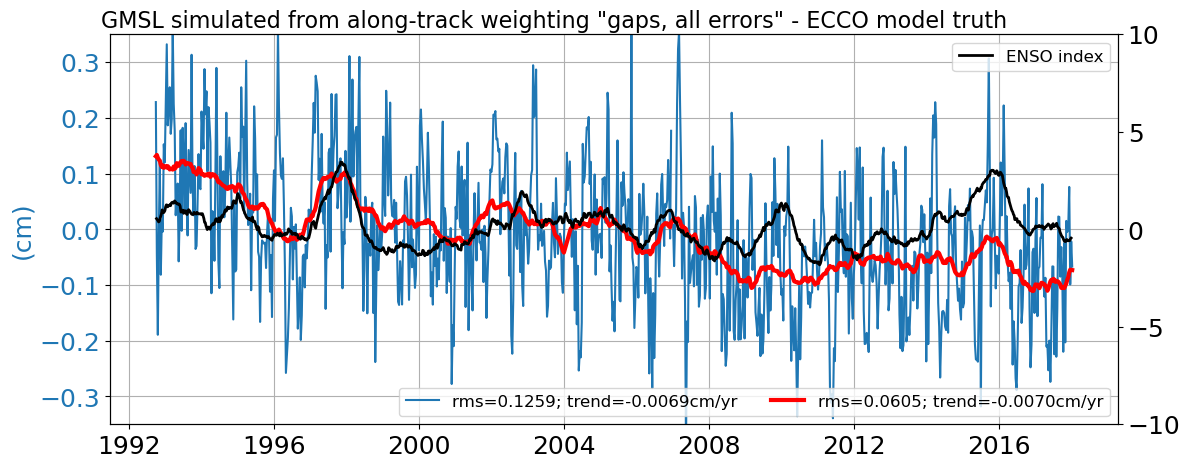

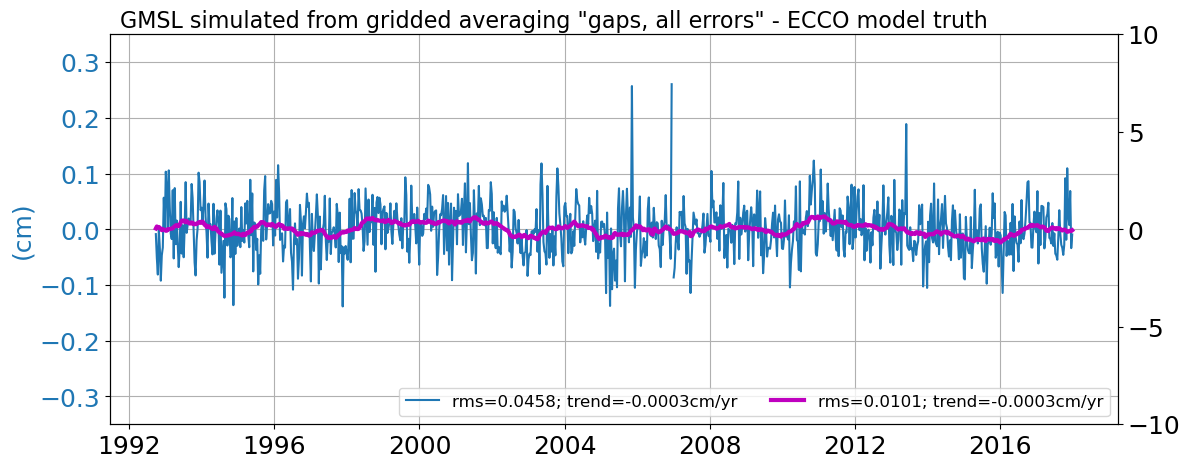

In [23]:
t=alongtrack_gmsl_3errors_2cm_nosicapplied.time.values
a=(alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values
ind=np.where(np.isfinite(a))
a=a[ind]
t=t[ind]
t=np.linspace(0, 1, len(t)) #need to be between 0 and 1
sig=xr.DataArray(data=a,dims=['time'],coords=dict(time=t))
t=alongtrack_gmsl_3errors_2cm_nosicapplied.time.values
t=t[ind]
smooth_diff_3errors_alongtrack2=(alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms_3errors_alongtrack=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_3errors_alongtrack2.values))        
smooth_rms_3errors_alongtrack=np.sqrt(np.nansum(smooth_diff_3errors_alongtrack2.values[ind]**2,axis=0)/len(ind[0]))

result = (alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff_3errors_alongtrack2).polyfit(dim = "time", skipna=True, deg = 1)
trend_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365

t=np.linspace(0, 1, len(gmsl_grids_3errors_2cm_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_3errors_grids2=(gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms_3errors_grids=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_3errors_grids2.values))        
smooth_rms_3errors_grids=np.sqrt(np.nansum(smooth_diff_3errors_grids2.values[ind]**2,axis=0)/len(ind[0]))

result = (gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).polyfit(dim = "time", skipna=True, deg = 1)
trend_grid = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365
result = (smooth_diff_3errors_grids2).polyfit(dim = "time", skipna=True, deg = 1)
trend_grid_smooth = result.polyfit_coefficients.sel(degree=1).values*86400000000000*365

fig,ax=plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.plot(alongtrack_gmsl_3errors_2cm_nosicapplied.time,alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100,label='rms='+"%.4f" % rms_3errors_alongtrack+'; trend='+"%.4f" % trend+'cm/yr');
# (gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='grids-ECCO; rms='+"%.4f" % rms_3errors_grids);
ax2.plot(enso.time,enso.enso_id,label='ENSO index',color='k',linewidth=2);
ax.plot(smooth_diff_3errors_alongtrack2.time,smooth_diff_3errors_alongtrack2,linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_3errors_alongtrack+'; trend='+"%.4f" % trend_smooth+'cm/yr');
# smooth_diff_3errors_grids2.plot(linewidth=3,color='m',label='grids-ECCO; rms='+"%.4f" % smooth_rms_3errors_grids);
ax.grid()
# ax2.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.35,0.35)
ax2.set_ylim(-10,10)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL simulated from along-track weighting "gaps, all errors" - ECCO model truth', fontsize=16)
ax.legend(ncol=2, loc='lower right',fontsize=12)
ax2.legend(ncol=2, loc='upper right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig2_GMSL_diff_ecco_alongtrack_3errors_2cm_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

fig,ax=plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
# (alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100).plot(label='rms='+"%.4f" % rms_3errors_alongtrack);
ax.plot(gmsl_grids_3errors_2cm_nosicapplied.time,gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100-ECCO_global_mean_sea_level_nosicapplied.gmsl_ecco*100,label='rms='+"%.4f" % rms_3errors_grids+'; trend='+"%.4f" % trend_grid+'cm/yr');
# smooth_diff_3errors_alongtrack2.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms_3errors_alongtrack);
ax.plot(smooth_diff_3errors_grids2.time,smooth_diff_3errors_grids2,linewidth=3,color='m',label='rms='+"%.4f" % smooth_rms_3errors_grids+'; trend='+"%.4f" % trend_grid_smooth+'cm/yr');
ax.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.35,0.35)
ax2.set_ylim(-10,10)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL simulated from gridded averaging "gaps, all errors" - ECCO model truth', fontsize=16)
ax.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig3_GMSL_diff_ecco_grids_3errors_2cm_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

# FIGURE 4 - BECKLEY DAILY FILES AND SIMULATED ALONG TRACK - GRIDS ######################################

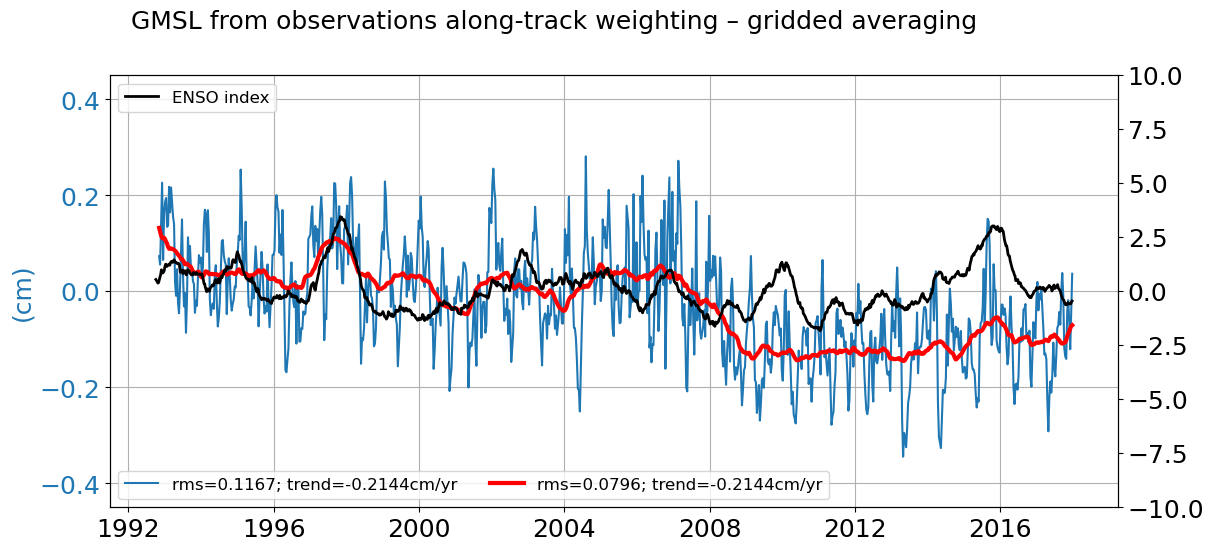

In [24]:
smooth_diff_alongtrack=(gmsl_alongtrack_beckley.gmsl_beckley_daily_alongtrack*100-gmsl_grids_beckley.gmsl_grids_beckley*100)[2:].rolling(time=37, min_periods=1, center=True).mean()

result = (gmsl_alongtrack_beckley.gmsl_beckley_daily_alongtrack*100-gmsl_grids_beckley.gmsl_grids_beckley*100)[2:].polyfit(dim = "time", deg = 1, skipna=True)
trend = result.polyfit_coefficients.sel(degree=1)*int(gmsl_grids_beckley.time[-1]-gmsl_grids_beckley.time[2])
strtrend="%.4f" % (trend)

result = smooth_diff_alongtrack.polyfit(dim = "time", deg = 1, skipna=True)
trend_smooth = result.polyfit_coefficients.sel(degree=1)*int(gmsl_grids_beckley.time[-1]-gmsl_grids_beckley.time[2])
strtrend_smooth="%.4f" % (trend_smooth)

ind = np.where(np.isfinite(gmsl_alongtrack_beckley.gmsl_beckley_daily_alongtrack*100-gmsl_grids_beckley.gmsl_grids_beckley*100)[2:])        
rms=np.sqrt(np.nansum((gmsl_alongtrack_beckley.gmsl_beckley_daily_alongtrack*100-gmsl_grids_beckley.gmsl_grids_beckley*100)[2:][ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
smooth_rms=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))

fig,ax=plt.subplots(figsize=(12,6))
(gmsl_alongtrack_beckley.gmsl_beckley_daily_alongtrack*100-gmsl_grids_beckley.gmsl_grids_beckley*100)[2:].plot(label='rms='+"%.4f" % rms+'; trend='+"%.4f" % trend+'cm/yr');
ax2 = ax.twinx()
ax2.plot(enso.time,enso.enso_id,label='ENSO index',color='k',linewidth=2);
ax.plot(smooth_diff_alongtrack.time,smooth_diff_alongtrack,linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms+'; trend='+"%.4f" % trend_smooth+'cm/yr');
ax.grid()
# ax2.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.45,0.45)
ax2.set_ylim(-10,10)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL from observations along-track weighting – gridded averaging', fontsize=18)
ax.legend(ncol=2, loc='lower left',fontsize=12)
ax2.legend(ncol=2, loc='upper left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.87,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig4_GMSL_diff_GSFC_alongtrack_grids.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

In [25]:
# t=np.linspace(0, 1, len(gmsl_grids_3errors_2cm.gmsl_grids.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100-gmsl_grids_3errors_2cm.gmsl_grids*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_alongtrack=(alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100-gmsl_grids_3errors_2cm.gmsl_grids*100).rolling(time=37, min_periods=1, center=True).mean()

# result = (alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100-gmsl_grids_3errors_2cm.gmsl_grids*100).polyfit(dim = "time", deg = 1, skipna=True)
# trend_3errors_2cm = result.polyfit_coefficients.sel(degree=1)*int(gmsl_grids_3errors_2cm.time[-1]-gmsl_grids_3errors_2cm.time[0])
# strtrend_3errors_2cm="%.4f" % (trend_3errors_2cm)

# result = smooth_diff_alongtrack.polyfit(dim = "time", deg = 1, skipna=True)
# trend_3errors_2cm = result.polyfit_coefficients.sel(degree=1)*int(gmsl_grids_3errors_2cm.time[-1]-gmsl_grids_3errors_2cm.time[0])
# strtrend_smooth_3errors_2cm="%.4f" % (trend_3errors_2cm)

# ind = np.where(np.isfinite(sig.values))        
# rms=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
# smooth_rms=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))

# fig,ax=plt.subplots(figsize=(10,5))
# (alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100-gmsl_grids_3errors_2cm.gmsl_grids*100).plot(label='rms='+"%.4f" % rms);
# smooth_diff_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('GMSL simulated alongtrack - grids (missing data+random noise+orbit error)', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'Fig4_GMSL_diff_alongtrack_grids_3errors_2cm.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

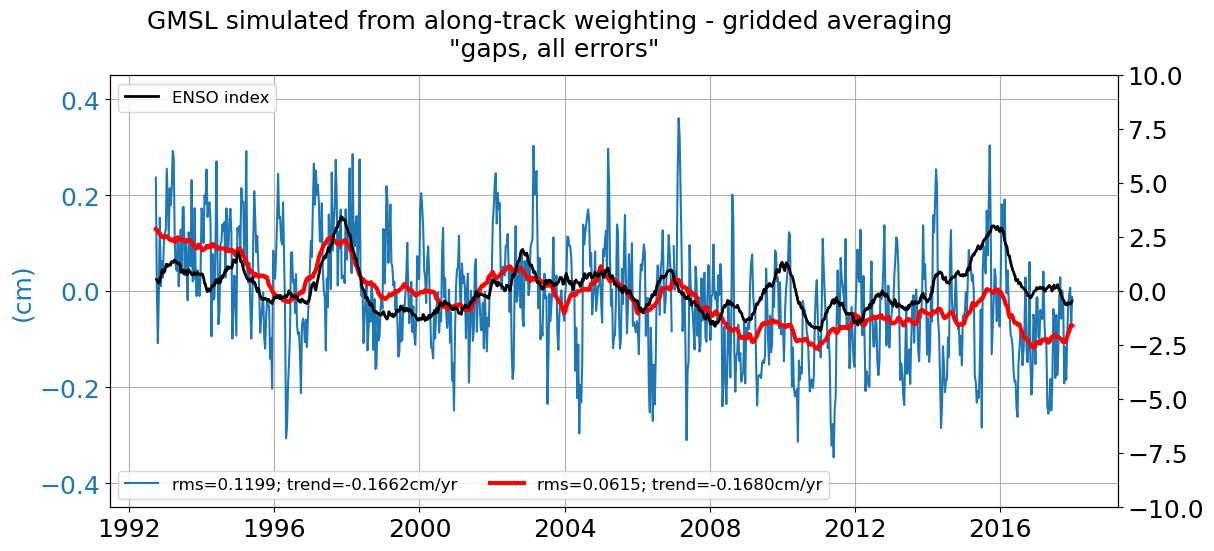

In [26]:
t=np.linspace(0, 1, len(gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_alongtrack=(alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100).rolling(time=37, min_periods=1, center=True).mean()

result = (alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100).polyfit(dim = "time", deg = 1, skipna=True)
trend_3errors_2cm = result.polyfit_coefficients.sel(degree=1)*int(gmsl_grids_3errors_2cm_nosicapplied.time[-1]-gmsl_grids_3errors_2cm_nosicapplied.time[0])
strtrend_3errors_2cm="%.4f" % (trend_3errors_2cm)

result = smooth_diff_alongtrack.polyfit(dim = "time", deg = 1, skipna=True)
trend_3errors_2cm_smooth = result.polyfit_coefficients.sel(degree=1)*int(gmsl_grids_3errors_2cm_nosicapplied.time[-1]-gmsl_grids_3errors_2cm_nosicapplied.time[0])
strtrend_smooth_3errors_2cm="%.4f" % (trend_3errors_2cm_smooth)

ind = np.where(np.isfinite(sig.values))        
rms=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
smooth_rms=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))

fig,ax=plt.subplots(figsize=(12,6))
ax2 = ax.twinx()
ax.plot(gmsl_grids_3errors_2cm_nosicapplied.time,alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-gmsl_grids_3errors_2cm_nosicapplied.gmsl_grids*100,label='rms='+"%.4f" % rms+'; trend='+"%.4f" % trend_3errors_2cm+'cm/yr');
ax2.plot(enso.time,enso.enso_id,label='ENSO index',color='k',linewidth=2);
ax.plot(smooth_diff_alongtrack.time,smooth_diff_alongtrack,linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms+'; trend='+"%.4f" % trend_3errors_2cm_smooth+'cm/yr');
ax.grid()
# ax2.grid()
ax.set_ylabel('(cm)',fontsize=18,color='#1f77b4')
ax.set_xlabel('')
ax2.set_xlabel('')
ax.set_ylim(-0.45,0.45)
ax2.set_ylim(-10,10)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.tick_params(axis='y', which='major', labelsize=18,labelcolor='#1f77b4')
ax2.tick_params(axis='both', which='major', labelsize=18,labelcolor='k')
fig.suptitle('GMSL simulated from along-track weighting - gridded averaging \n"gaps, all errors"', fontsize=18)
ax.legend(ncol=2, loc='lower left',fontsize=12)
ax2.legend(ncol=2, loc='upper left',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.87,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'Fig4_GMSL_diff_alongtrack_grids_3errors_2cm_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

# FIGURE S6 DIFF ALONG TRACK ERROR - NO ERROR ######################################

In [27]:
# t=np.linspace(0, 1, len(alongtrack_gmsl.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_alongtrack=(alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
# smooth_rms=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))
# fig,ax=plt.subplots(figsize=(10,5))
# (alongtrack_gmsl_randomnoise.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).plot(label='rms='+"%.4f" % rms);
# smooth_diff_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('Random noise impact on GMSL (along-track)', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'FigS6_GMSL_alongtrack_diff_randomnoise_noerror.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

In [28]:
# t=np.linspace(0, 1, len(alongtrack_gmsl.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_alongtrack=(alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
# smooth_rms=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))
# fig,ax=plt.subplots(figsize=(10,5))
# (alongtrack_gmsl_missingdata.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).plot(label='rms='+"%.4f" % rms);
# smooth_diff_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('Missing data impact on GMSL (along-track)', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'FigS6_GMSL_alongtrack_diff_missingdata_noerror.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

In [29]:
# t=np.linspace(0, 1, len(alongtrack_gmsl.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(alongtrack_gmsl_orbiterror_2cm.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_alongtrack=(alongtrack_gmsl_orbiterror_2cm.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
# smooth_rms=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))
# fig,ax=plt.subplots(figsize=(10,5))
# (alongtrack_gmsl_orbiterror_2cm.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).plot(label='rms='+"%.4f" % rms);
# smooth_diff_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('Orbit error impact on GMSL (along-track)', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'FigS6_GMSL_alongtrack_diff_2cmorbiterror_noerror.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

In [30]:
# t=np.linspace(0, 1, len(alongtrack_gmsl.time.values)) #need to be between 0 and 1
# sig=xr.DataArray(data=(alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).values,dims=['time'],coords=dict(time=t))
# smooth_diff_alongtrack=(alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).rolling(time=37, min_periods=1, center=True).mean()

# ind = np.where(np.isfinite(sig.values))        
# rms=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
# ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
# smooth_rms=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))
# fig,ax=plt.subplots(figsize=(10,5))
# (alongtrack_gmsl_3errors_2cm.gmsl_ecco_alongtrack*100-alongtrack_gmsl.gmsl_ecco_alongtrack*100).plot(label='rms='+"%.4f" % rms);
# smooth_diff_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms);
# plt.grid()
# plt.ylabel('(cm)',fontsize=18)
# plt.xlabel('')
# plt.tick_params(axis='both', which='major', labelsize=18)
# fig.suptitle('Missing data+random noise+orbit error impact on GMSL (along-track)', fontsize=18)
# plt.legend(ncol=2, loc='lower right',fontsize=12)
# fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
# plt.savefig(fig_dir / 'FigS6_GMSL_alongtrack_diff_3errors_2cm_noerror.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

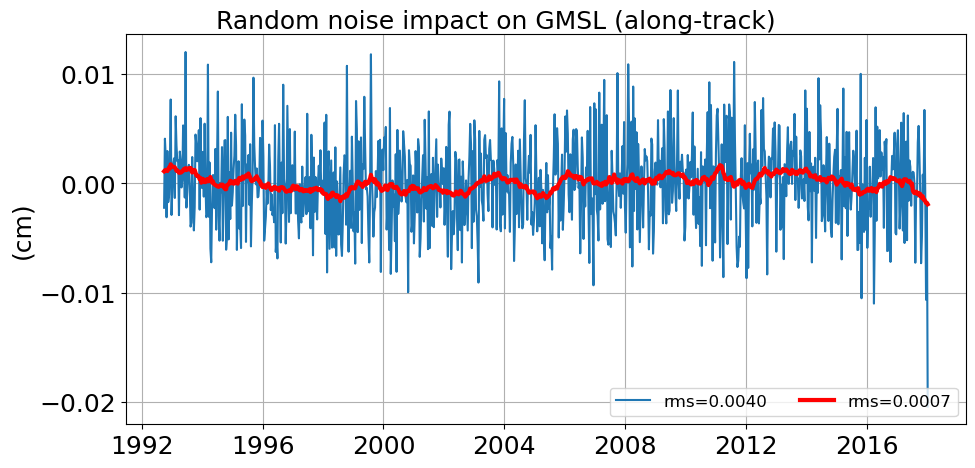

In [31]:
t=np.linspace(0, 1, len(alongtrack_gmsl_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(alongtrack_gmsl_randomnoise_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_alongtrack=(alongtrack_gmsl_randomnoise_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
smooth_rms=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))
fig,ax=plt.subplots(figsize=(10,5))
(alongtrack_gmsl_randomnoise_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).plot(label='rms='+"%.4f" % rms);
smooth_diff_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms);
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
fig.suptitle('Random noise impact on GMSL (along-track)', fontsize=18)
plt.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'FigS6_GMSL_alongtrack_diff_randomnoise_noerror_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

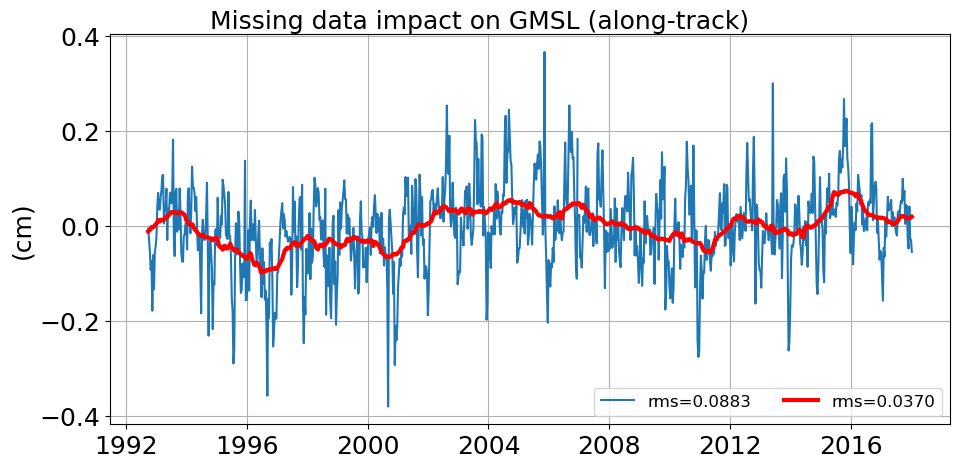

In [32]:
t=np.linspace(0, 1, len(alongtrack_gmsl_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(alongtrack_gmsl_missingdata_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_alongtrack=(alongtrack_gmsl_missingdata_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
smooth_rms=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))
fig,ax=plt.subplots(figsize=(10,5))
(alongtrack_gmsl_missingdata_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).plot(label='rms='+"%.4f" % rms);
smooth_diff_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms);
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
fig.suptitle('Missing data impact on GMSL (along-track)', fontsize=18)
plt.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'FigS6_GMSL_alongtrack_diff_missingdata_noerror_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

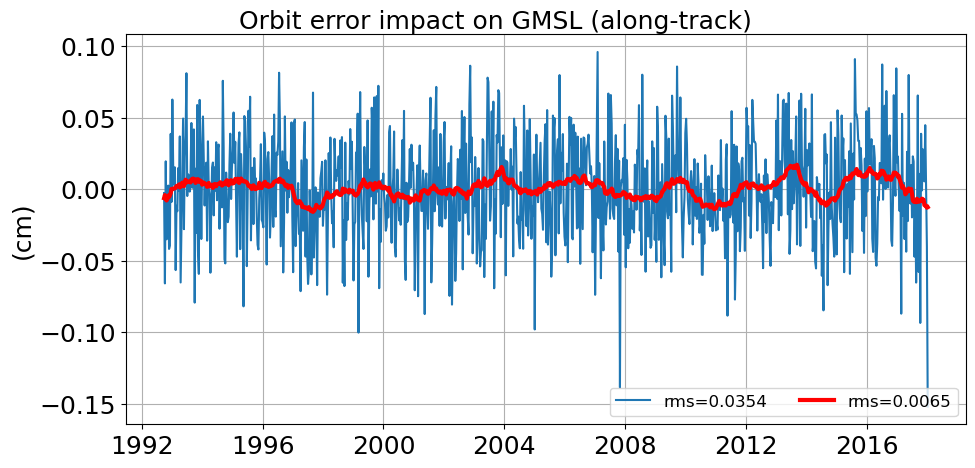

In [33]:
t=np.linspace(0, 1, len(alongtrack_gmsl_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(alongtrack_gmsl_orbiterror_2cm_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_alongtrack=(alongtrack_gmsl_orbiterror_2cm_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
smooth_rms=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))
fig,ax=plt.subplots(figsize=(10,5))
(alongtrack_gmsl_orbiterror_2cm_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).plot(label='rms='+"%.4f" % rms);
smooth_diff_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms);
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
fig.suptitle('Orbit error impact on GMSL (along-track)', fontsize=18)
plt.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'FigS6_GMSL_alongtrack_diff_2cmorbiterror_noerror_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')

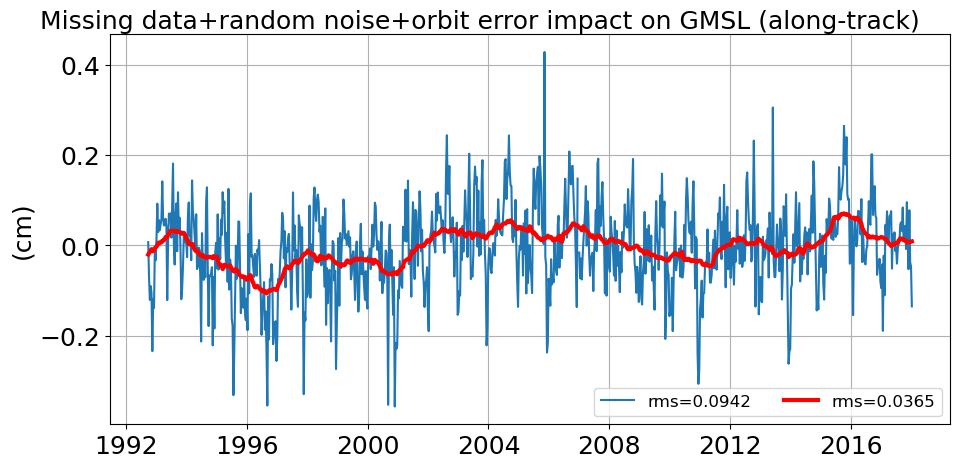

In [34]:
t=np.linspace(0, 1, len(alongtrack_gmsl_nosicapplied.time.values)) #need to be between 0 and 1
sig=xr.DataArray(data=(alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).values,dims=['time'],coords=dict(time=t))
smooth_diff_alongtrack=(alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).rolling(time=37, min_periods=1, center=True).mean()

ind = np.where(np.isfinite(sig.values))        
rms=np.sqrt(np.nansum(sig.values[ind]**2,axis=0)/len(ind[0]))
ind = np.where(np.isfinite(smooth_diff_alongtrack.values))        
smooth_rms=np.sqrt(np.nansum(smooth_diff_alongtrack.values[ind]**2,axis=0)/len(ind[0]))
fig,ax=plt.subplots(figsize=(10,5))
(alongtrack_gmsl_3errors_2cm_nosicapplied.gmsl_ecco_alongtrack*100-alongtrack_gmsl_nosicapplied.gmsl_ecco_alongtrack*100).plot(label='rms='+"%.4f" % rms);
smooth_diff_alongtrack.plot(linewidth=3,color='r',label='rms='+"%.4f" % smooth_rms);
plt.grid()
plt.ylabel('(cm)',fontsize=18)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=18)
fig.suptitle('Missing data+random noise+orbit error impact on GMSL (along-track)', fontsize=18)
plt.legend(ncol=2, loc='lower right',fontsize=12)
fig.subplots_adjust(left=0.13,top=0.93,bottom=0.15,right=0.97)
plt.savefig(fig_dir / 'FigS6_GMSL_alongtrack_diff_3errors_2cm_noerror_nosicapplied.png',bbox_inches='tight',dpi=200,transparent=False,facecolor='white')